<a href="https://colab.research.google.com/github/clarefausty/Python-Bioinformatics/blob/main/Python_for_Bioinformatics_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bioinformatics Project - Computational Drug Discovery [Part 2] Exploratory Data Analysis**

Chinwendu Faustina Achilonu

In this Jupyter notebook, i  will be building a real-life **data science project**.  i  will be building a machine learning model using the ChEMBL bioactivity data.

In **Part 2**, i will be performing Descriptor Calculation and Exploratory Data Analysis.

---

## **Install conda and rdkit**

In [1]:
# wget is a command-line utility for downloading files from the web.
# The URL https://repo.anaconda.com/miniconda/Miniconda3-py39_4.9.2-Linux-x86_64.sh points to the Miniconda installer script for Linux.
! wget https://repo.anaconda.com/miniconda/Miniconda3-py39_4.9.2-Linux-x86_64.sh

# chmod +x changes the mode of the file to make it executable.
# Miniconda3-py39_4.9.2-Linux-x86_64.sh is the installer script downloaded in the previous step.
! chmod +x Miniconda3-py39_4.9.2-Linux-x86_64.sh

# This line installs Miniconda silently to the /usr/local directory.
! bash ./Miniconda3-py39_4.9.2-Linux-x86_64.sh -b -f -p /usr/local

# This line installs the RDKit package using Conda.
# conda install is the command to install packages using Conda.
# -c rdkit specifies the channel (source) from which to install RDKit.
# rdkit is the package name.
# -y automatically confirms the installation without prompting the user.
! /usr/local/bin/conda install -c rdkit rdkit -y

# This line ensures that the Python interpreter can find the installed RDKit package by adding the directory where Conda installs packages to the system's Python path.
# import sys imports the sys module, which provides access to system-specific parameters and functions.
# sys.path.append('/usr/local/lib/python3.9/site-packages/') appends the specified directory to the Python path.
import sys
sys.path.append('/usr/local/lib/python3.9/site-packages/')



--2024-07-21 09:59:12--  https://repo.anaconda.com/miniconda/Miniconda3-py39_4.9.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.32.241, 104.16.191.158, 2606:4700::6810:20f1, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.32.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61451533 (59M) [application/x-sh]
Saving to: ‘Miniconda3-py39_4.9.2-Linux-x86_64.sh’

Miniconda3-py39_4.9 100%[===================>]  58.60M  96.8MB/s    in 0.6s    

2024-07-21 09:59:13 (96.8 MB/s) - ‘Miniconda3-py39_4.9.2-Linux-x86_64.sh’ saved [61451533/61451533]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - brotlipy==0.7.0=py39h27cfd23_1003
    - ca-certificates==2020.12.8=h06a4308_0
    - certifi==2020.12.5=py39h06a4308_0
    - cffi==1.14.4=py39h261ae71_0
    - chardet==3.0.4=py39h06a4308_100

In [2]:
!pip uninstall rdkit -y

In [3]:
!pip install rdkit-pypi

     |████████████████████████████████| 29.4 MB 50.4 MB/s 
     |████████████████████████████████| 19.3 MB 368 kB/s 
     |████████████████████████████████| 4.5 MB 53.8 MB/s 


## **Load bioactivity data**

In [ ]:
!wget "https://github.com/clarefausty/Python-Bioinformatics/blob/main/files/Ovarian_cancer_cell_line_processed_bioactivity_data.csv"


--2024-07-20 11:49:38--  https://github.com/clarefausty/Python-Bioinformatics/blob/main/files/Ovarian_cancer_cell_line_processed_bioactivity_data.csv
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘Ovarian_cancer_cell_line_processed_bioactivity_data.csv’

Ovarian_cancer_cell     [  <=>               ] 298.50K  1.23MB/s    in 0.2s    

2024-07-20 11:49:39 (1.23 MB/s) - ‘Ovarian_cancer_cell_line_processed_bioactivity_data.csv’ saved [305663]



In [4]:
import pandas as pd



In [5]:
df = pd.read_csv("Ovarian_cancer_cell_line_processed_bioactivity_data.csv")
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL84463,COc1cc2cc(C(=O)N3CC(CCl)c4c3cc(NC(=O)OCc3ccc([...,62.0,active
1,CHEMBL23330,NC(=O)c1cc(N2CC2)c([N+](=O)[O-])cc1[N+](=O)[O-],174000.0,inactive
2,CHEMBL311087,COc1cc2cc(C(=O)N3CC(CCl)c4c3cc(NC(=O)OCc3ccc([...,145.0,active
3,CHEMBL288377,CNc1cc2c(c3ccccc13)C(CCl)CN2C(=O)c1cc2cc(OC)c(...,0.2,active
4,CHEMBL78019,COc1cc2cc(C(=O)N3CC(CCl)c4c3cc(NC(=O)OCc3ccc([...,224.0,active
5,CHEMBL314246,COc1cc2cc(C(=O)N3CC(CCl)c4c3cc(NC(=O)OCc3ccc([...,114.0,active
6,CHEMBL316382,COc1cc([N+](=O)[O-])ccc1COC(=O)Nc1cc2c(c3ccccc...,59.0,active
7,CHEMBL314247,COCCOc1cc([N+](=O)[O-])ccc1COC(=O)Nc1cc2c(c3cc...,106.0,active
8,CHEMBL79354,COc1cc2cc(C(=O)N3CC(CCl)c4c3cc(NC(=O)OCc3ccc([...,189.0,active
9,CHEMBL83545,COc1cc([N+](=O)[O-])ccc1COC(=O)Nc1ccc(COC(=O)N...,223.0,active


## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10

### **Import libraries**

In [6]:
#Import libraries
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calculate descriptors**

In [8]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [10]:
df_lipinski = lipinski(df.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,645.068,6.9866,2.0,8.0
1,252.186,0.4219,1.0,6.0
2,719.147,6.7478,3.0,10.0
3,479.964,5.3714,2.0,5.0
4,705.120,6.3577,3.0,10.0
5,735.146,5.7186,4.0,11.0
6,675.094,6.9952,2.0,9.0
7,719.147,7.0118,2.0,10.0
8,746.217,7.3171,2.0,10.0
9,824.243,8.7439,3.0,11.0


 combine the 2 DataFrame (df and df_lipinski)

In [11]:
df_combined = pd.concat([df, df_lipinski], axis=1)
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL84463,COc1cc2cc(C(=O)N3CC(CCl)c4c3cc(NC(=O)OCc3ccc([...,62.0,active,645.068,6.9866,2.0,8.0
1,CHEMBL23330,NC(=O)c1cc(N2CC2)c([N+](=O)[O-])cc1[N+](=O)[O-],174000.0,inactive,252.186,0.4219,1.0,6.0
2,CHEMBL311087,COc1cc2cc(C(=O)N3CC(CCl)c4c3cc(NC(=O)OCc3ccc([...,145.0,active,719.147,6.7478,3.0,10.0
3,CHEMBL288377,CNc1cc2c(c3ccccc13)C(CCl)CN2C(=O)c1cc2cc(OC)c(...,0.2,active,479.964,5.3714,2.0,5.0
4,CHEMBL78019,COc1cc2cc(C(=O)N3CC(CCl)c4c3cc(NC(=O)OCc3ccc([...,224.0,active,705.120,6.3577,3.0,10.0
5,CHEMBL314246,COc1cc2cc(C(=O)N3CC(CCl)c4c3cc(NC(=O)OCc3ccc([...,114.0,active,735.146,5.7186,4.0,11.0
6,CHEMBL316382,COc1cc([N+](=O)[O-])ccc1COC(=O)Nc1cc2c(c3ccccc...,59.0,active,675.094,6.9952,2.0,9.0
7,CHEMBL314247,COCCOc1cc([N+](=O)[O-])ccc1COC(=O)Nc1cc2c(c3cc...,106.0,active,719.147,7.0118,2.0,10.0
8,CHEMBL79354,COc1cc2cc(C(=O)N3CC(CCl)c4c3cc(NC(=O)OCc3ccc([...,189.0,active,746.217,7.3171,2.0,10.0
9,CHEMBL83545,COc1cc([N+](=O)[O-])ccc1COC(=O)Nc1ccc(COC(=O)N...,223.0,active,824.243,8.7439,3.0,11.0


### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [12]:


import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

#input['pIC50'] = pIC50 adds the pIC50 list as a new column named 'pIC50' to the input DataFrame.
    input['pIC50'] = pIC50
#x = input.drop('standard_value_norm', 1) drops the original 'standard_value_norm' column from the input DataFrame
    x = input.drop('standard_value_norm', axis=1)

    return x

In [13]:
df_combined.standard_value.describe()

count        34.000000
mean      29292.485294
std       99945.115092
min           0.200000
25%          56.000000
50%         173.500000
75%       11750.000000
max      562800.000000
Name: standard_value, dtype: float64

In [14]:
-np.log10( (10**-9)* 100000000 )

1.0

In [15]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [16]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value',axis=1)

    return x

First apply the norm_value() function so that the values in the standard_value column is normalized.

In [17]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL84463,COc1cc2cc(C(=O)N3CC(CCl)c4c3cc(NC(=O)OCc3ccc([...,active,645.068,6.9866,2.0,8.0,62.0
1,CHEMBL23330,NC(=O)c1cc(N2CC2)c([N+](=O)[O-])cc1[N+](=O)[O-],inactive,252.186,0.4219,1.0,6.0,174000.0
2,CHEMBL311087,COc1cc2cc(C(=O)N3CC(CCl)c4c3cc(NC(=O)OCc3ccc([...,active,719.147,6.7478,3.0,10.0,145.0
3,CHEMBL288377,CNc1cc2c(c3ccccc13)C(CCl)CN2C(=O)c1cc2cc(OC)c(...,active,479.964,5.3714,2.0,5.0,0.2
4,CHEMBL78019,COc1cc2cc(C(=O)N3CC(CCl)c4c3cc(NC(=O)OCc3ccc([...,active,705.120,6.3577,3.0,10.0,224.0
5,CHEMBL314246,COc1cc2cc(C(=O)N3CC(CCl)c4c3cc(NC(=O)OCc3ccc([...,active,735.146,5.7186,4.0,11.0,114.0
6,CHEMBL316382,COc1cc([N+](=O)[O-])ccc1COC(=O)Nc1cc2c(c3ccccc...,active,675.094,6.9952,2.0,9.0,59.0
7,CHEMBL314247,COCCOc1cc([N+](=O)[O-])ccc1COC(=O)Nc1cc2c(c3cc...,active,719.147,7.0118,2.0,10.0,106.0
8,CHEMBL79354,COc1cc2cc(C(=O)N3CC(CCl)c4c3cc(NC(=O)OCc3ccc([...,active,746.217,7.3171,2.0,10.0,189.0
9,CHEMBL83545,COc1cc([N+](=O)[O-])ccc1COC(=O)Nc1ccc(COC(=O)N...,active,824.243,8.7439,3.0,11.0,223.0


In [18]:
df_norm.standard_value_norm.describe()

count        34.000000
mean      29292.485294
std       99945.115092
min           0.200000
25%          56.000000
50%         173.500000
75%       11750.000000
max      562800.000000
Name: standard_value_norm, dtype: float64

In [19]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL84463,COc1cc2cc(C(=O)N3CC(CCl)c4c3cc(NC(=O)OCc3ccc([...,active,645.068,6.9866,2.0,8.0,7.207608
1,CHEMBL23330,NC(=O)c1cc(N2CC2)c([N+](=O)[O-])cc1[N+](=O)[O-],inactive,252.186,0.4219,1.0,6.0,3.759451
2,CHEMBL311087,COc1cc2cc(C(=O)N3CC(CCl)c4c3cc(NC(=O)OCc3ccc([...,active,719.147,6.7478,3.0,10.0,6.838632
3,CHEMBL288377,CNc1cc2c(c3ccccc13)C(CCl)CN2C(=O)c1cc2cc(OC)c(...,active,479.964,5.3714,2.0,5.0,9.698970
4,CHEMBL78019,COc1cc2cc(C(=O)N3CC(CCl)c4c3cc(NC(=O)OCc3ccc([...,active,705.120,6.3577,3.0,10.0,6.649752
5,CHEMBL314246,COc1cc2cc(C(=O)N3CC(CCl)c4c3cc(NC(=O)OCc3ccc([...,active,735.146,5.7186,4.0,11.0,6.943095
6,CHEMBL316382,COc1cc([N+](=O)[O-])ccc1COC(=O)Nc1cc2c(c3ccccc...,active,675.094,6.9952,2.0,9.0,7.229148
7,CHEMBL314247,COCCOc1cc([N+](=O)[O-])ccc1COC(=O)Nc1cc2c(c3cc...,active,719.147,7.0118,2.0,10.0,6.974694
8,CHEMBL79354,COc1cc2cc(C(=O)N3CC(CCl)c4c3cc(NC(=O)OCc3ccc([...,active,746.217,7.3171,2.0,10.0,6.723538
9,CHEMBL83545,COc1cc([N+](=O)[O-])ccc1COC(=O)Nc1ccc(COC(=O)N...,active,824.243,8.7439,3.0,11.0,6.651695


write this to CSV file.

In [22]:
df_final.to_csv('Ovarian_cancer_cell_line_processed_02_bioactivity_data.csv')

### **Remove the 'intermediate' bioactivity class**
Here,  remove the ``intermediate`` class from our data set.

In [24]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL84463,COc1cc2cc(C(=O)N3CC(CCl)c4c3cc(NC(=O)OCc3ccc([...,active,645.068,6.9866,2.0,8.0,7.207608
1,CHEMBL23330,NC(=O)c1cc(N2CC2)c([N+](=O)[O-])cc1[N+](=O)[O-],inactive,252.186,0.4219,1.0,6.0,3.759451
2,CHEMBL311087,COc1cc2cc(C(=O)N3CC(CCl)c4c3cc(NC(=O)OCc3ccc([...,active,719.147,6.7478,3.0,10.0,6.838632
3,CHEMBL288377,CNc1cc2c(c3ccccc13)C(CCl)CN2C(=O)c1cc2cc(OC)c(...,active,479.964,5.3714,2.0,5.0,9.698970
4,CHEMBL78019,COc1cc2cc(C(=O)N3CC(CCl)c4c3cc(NC(=O)OCc3ccc([...,active,705.120,6.3577,3.0,10.0,6.649752
5,CHEMBL314246,COc1cc2cc(C(=O)N3CC(CCl)c4c3cc(NC(=O)OCc3ccc([...,active,735.146,5.7186,4.0,11.0,6.943095
6,CHEMBL316382,COc1cc([N+](=O)[O-])ccc1COC(=O)Nc1cc2c(c3ccccc...,active,675.094,6.9952,2.0,9.0,7.229148
7,CHEMBL314247,COCCOc1cc([N+](=O)[O-])ccc1COC(=O)Nc1cc2c(c3cc...,active,719.147,7.0118,2.0,10.0,6.974694
8,CHEMBL79354,COc1cc2cc(C(=O)N3CC(CCl)c4c3cc(NC(=O)OCc3ccc([...,active,746.217,7.3171,2.0,10.0,6.723538
9,CHEMBL83545,COc1cc([N+](=O)[O-])ccc1COC(=O)Nc1ccc(COC(=O)N...,active,824.243,8.7439,3.0,11.0,6.651695


Let's write this to CSV file.

In [25]:
df_2class.to_csv('Ovarian_cancer_cell_line_processed_03_bioactivity_data.csv')

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [26]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

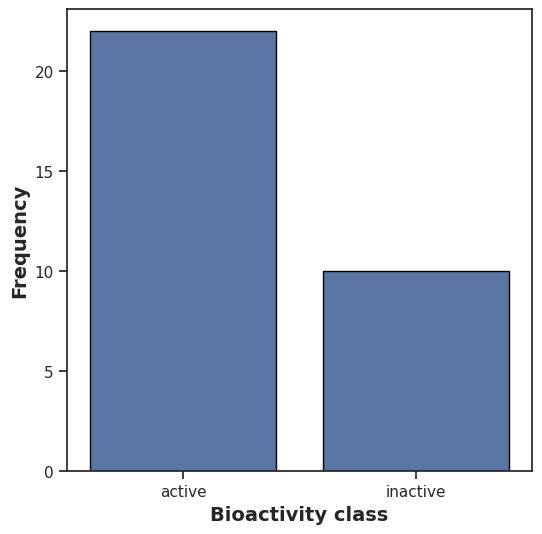

In [27]:
plt.figure(figsize=(6.0, 6.0))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

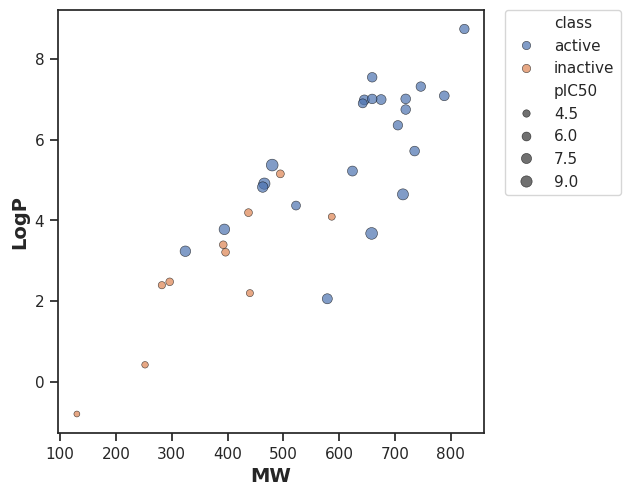

In [28]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### **Box plots**

#### **pIC50 value**

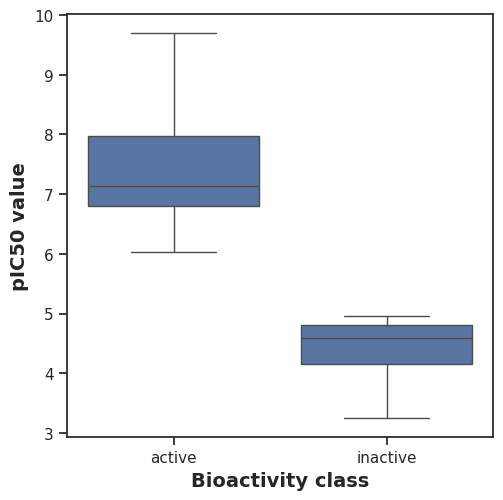

In [29]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [30]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [31]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,220.0,0.000008,0.05,Different distribution (reject H0)


#### **MW**

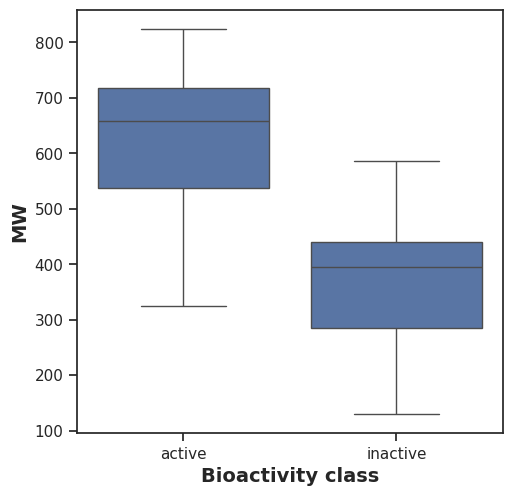

In [32]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [33]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,201.0,0.000234,0.05,Different distribution (reject H0)


#### **LogP**

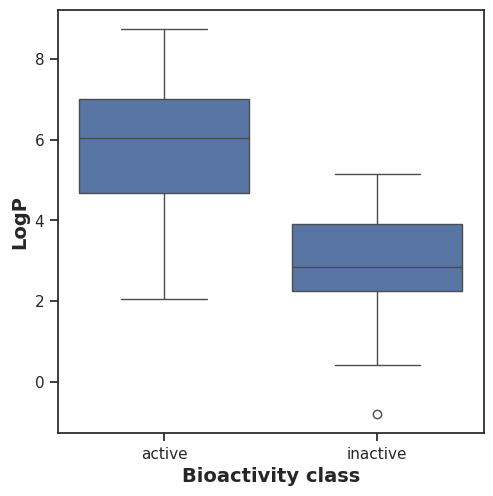

In [34]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [35]:
mannwhitney("LogP")

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,198.0,0.000375,0.05,Different distribution (reject H0)


#### **NumHDonors**

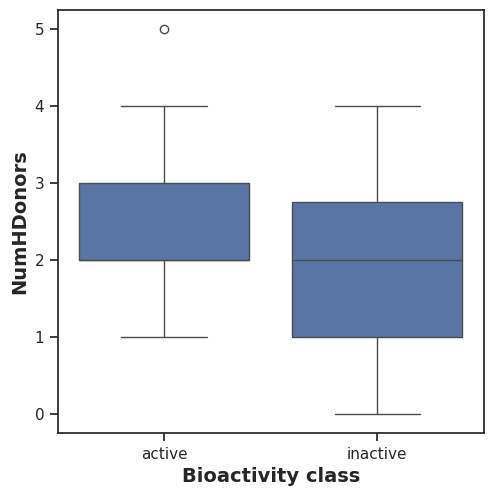

In [36]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [38]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,141.0,0.188901,0.05,Same distribution (fail to reject H0)


#### **NumHAcceptors**

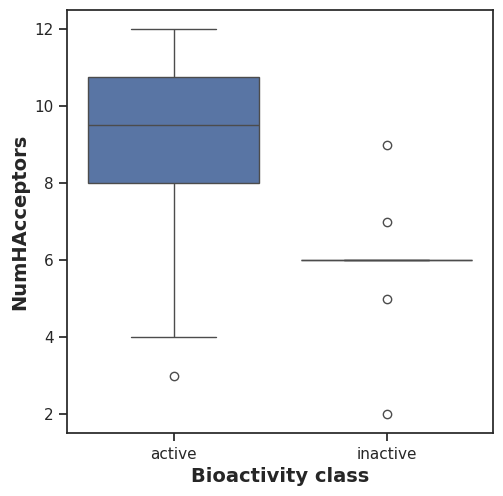

In [39]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [40]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,178.0,0.005605,0.05,Different distribution (reject H0)


#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

All of the 4 Lipinski's descriptors exhibited ***statistically significant difference*** between the **actives** and **inactives**.

## **Zip files**

In [41]:
! zip -r results.zip . -i *.csv *.pdf

  adding: Ovarian_cancer_cell_line_processed_bioactivity_data.csv (deflated 68%)
  adding: mannwhitneyu_pIC50.csv (deflated 9%)
  adding: plot_NumHDonors.pdf (deflated 37%)
  adding: plot_NumHAcceptors.pdf (deflated 37%)
  adding: Ovarian_cancer_cell_line_processed_03_bioactivity_data.csv (deflated 68%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 10%)
  adding: plot_MW_vs_LogP.pdf (deflated 24%)
  adding: plot_LogP.pdf (deflated 37%)
  adding: plot_bioactivity_class.pdf (deflated 39%)
  adding: mannwhitneyu_LogP.csv (deflated 8%)
  adding: plot_ic50.pdf (deflated 36%)
  adding: mannwhitneyu_MW.csv (deflated 10%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 9%)
  adding: Ovarian_cancer_cell_line_processed_02_bioactivity_data.csv (deflated 68%)
  adding: plot_MW.pdf (deflated 38%)
